# 初学者向けPandas100本ノックver1.0.3

In [1]:
# ライブラリーの読み込み
import pandas as pd
import glob

# DataFrameの準備
df = pd.read_csv('./data/titanic3.csv')
df2 = pd.read_csv('./data/data1.csv')
df3 = pd.read_csv('./data/data1_2.csv')
df4 = pd.read_csv('./data/data1_3.csv')
df5 = pd.read_csv('./data/data2.csv',encoding='cp932')

# ラベリング (80 - 81)

In [2]:
# 【80】
# dfのsex列をラベルエンコーディングし、
# dfの先頭5行を表示
# (from sklearn.preprocessing import LabelEncoderをインポート)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #ラベルエンコーダのインスタンスを作成
df['sex'] = le.fit_transform(df['sex']) #エンコーディング
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


・機械学習では文字列をそのまま、学習アルゴリズムに入力できないため、数値に変換する。LabelEncoder()では  
　例えば、以下のように文字列を数値に変換する。  

　male → 0  
　female → 1  

・RandomForestなど決定木での分類問題を解く場合には、ラベルエンコーディングすることが多い  

In [3]:
# 【81】
# dfのsex列をOne-hotエンコーディングし、
# dfの先頭5行を表示

df = pd.get_dummies(df, columns=['sex'])
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_0,sex_1
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


・機械学習では文字列をそのまま、学習アルゴリズムに入力できないため、数値に変換する。pd.get_dummiesでは  
　One-Hotエンコーディングが可能  
・回帰問題を解く場合には、One-hotエンコーディングすることが多い

# Pandasプロット (82 - 89)
Pandasプロットの機能については以下のサイトの説明が分かりやすいです  
[自調自考の旅](https://own-search-and-study.xyz/2016/08/03/pandas%E3%81%AEplot%E3%81%AE%E5%85%A8%E5%BC%95%E6%95%B0%E3%82%92%E4%BD%BF%E3%81%84%E3%81%93%E3%81%AA%E3%81%99/)

In [4]:
# 【82】
# dfのすべての数値列のヒストグラムを表示

import matplotlib

df.hist(figsize=(20,20), color='b')

Duplicate key in file WindowsPath('C:/Users/iiats/Anaconda3/envs/Python37/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


array([[<AxesSubplot:title={'center':'pclass'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'body'}>,
        <AxesSubplot:title={'center':'sex_0'}>,
        <AxesSubplot:title={'center':'sex_1'}>]], dtype=object)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


・データフレームの数値列をヒストグラムで描画したい場合は hist()を使用  
・figsize=()でグラフのサイズを指定可能  
・color=''でグラフの色を指定可能  
（'r'にすれば赤色表示）

<AxesSubplot:ylabel='Frequency'>

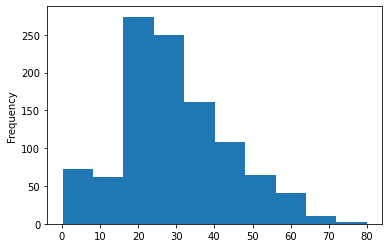

In [5]:
# 【83】
# dfのage列をヒストグラムで表示

df['age'].plot(kind='hist')

ヒストグラムを描画する場合は plot(kind='hist')を使用

<AxesSubplot:xlabel='name'>

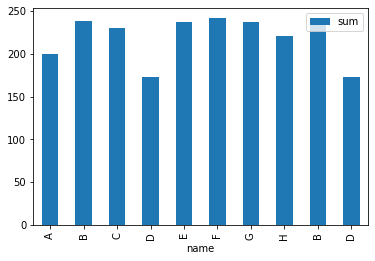

In [6]:
# 【84】
# df2のname列の要素ごとの3科目合計得点を棒グラフで表示

df2['sum'] = df2.iloc[:,2:5].sum(axis=1) #3科目合計の列を作成
df2[['name','sum']].plot(kind='bar',x=df2.columns[0])

・棒グラフを描画する場合は plot(kind='bar')を使用  
・df2.columns[0])はname列のこと。x=df2.columns[0]を指定し  
　x軸をname列にする(指定しないとどうなるかは試してみて下さい)

<AxesSubplot:xlabel='name'>

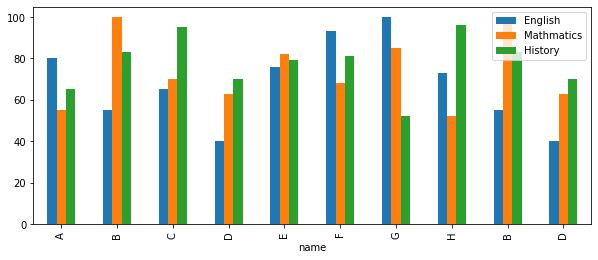

In [7]:
# 【85】
# df2のname列の要素ごとの3科目を棒グラフで
# 並べて表示


df2[['name','English','Mathmatics','History']].plot(kind='bar',figsize=(10,4),x=df2.columns[0])

・棒グラフを描画する場合は plot(kind='bar')を使用  
・「df2[['name','English','Mathmatics','History']]」のように使用したい列のみに絞る  
・df2.columns[0])はname列のこと。x=df2.columns[0]を指定し  
　x軸をname列にする(指定しないとどうなるかは試してみて下さい)

<AxesSubplot:xlabel='name'>

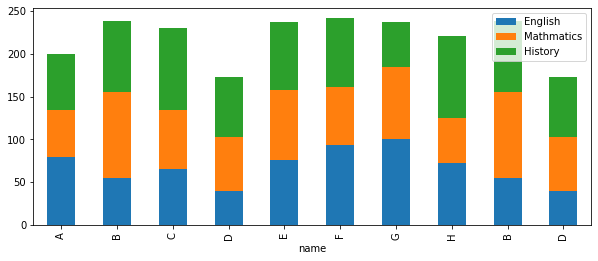

In [8]:
# 【86】
# df2のname列の要素ごとの3科目を積み上げ棒グラフで表示

df2[['name','English','Mathmatics','History']].plot(kind='bar',figsize=(10,4),
                                                    x=df2.columns[0],stacked=True)

・棒グラフを積み上げ表示する場合は stacked=Trueを指定  
・df2.columns[0])はname列のこと。x=df2.columns[0]を指定し  
　x軸をname列にする(指定しないとどうなるかは試してみて下さい)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


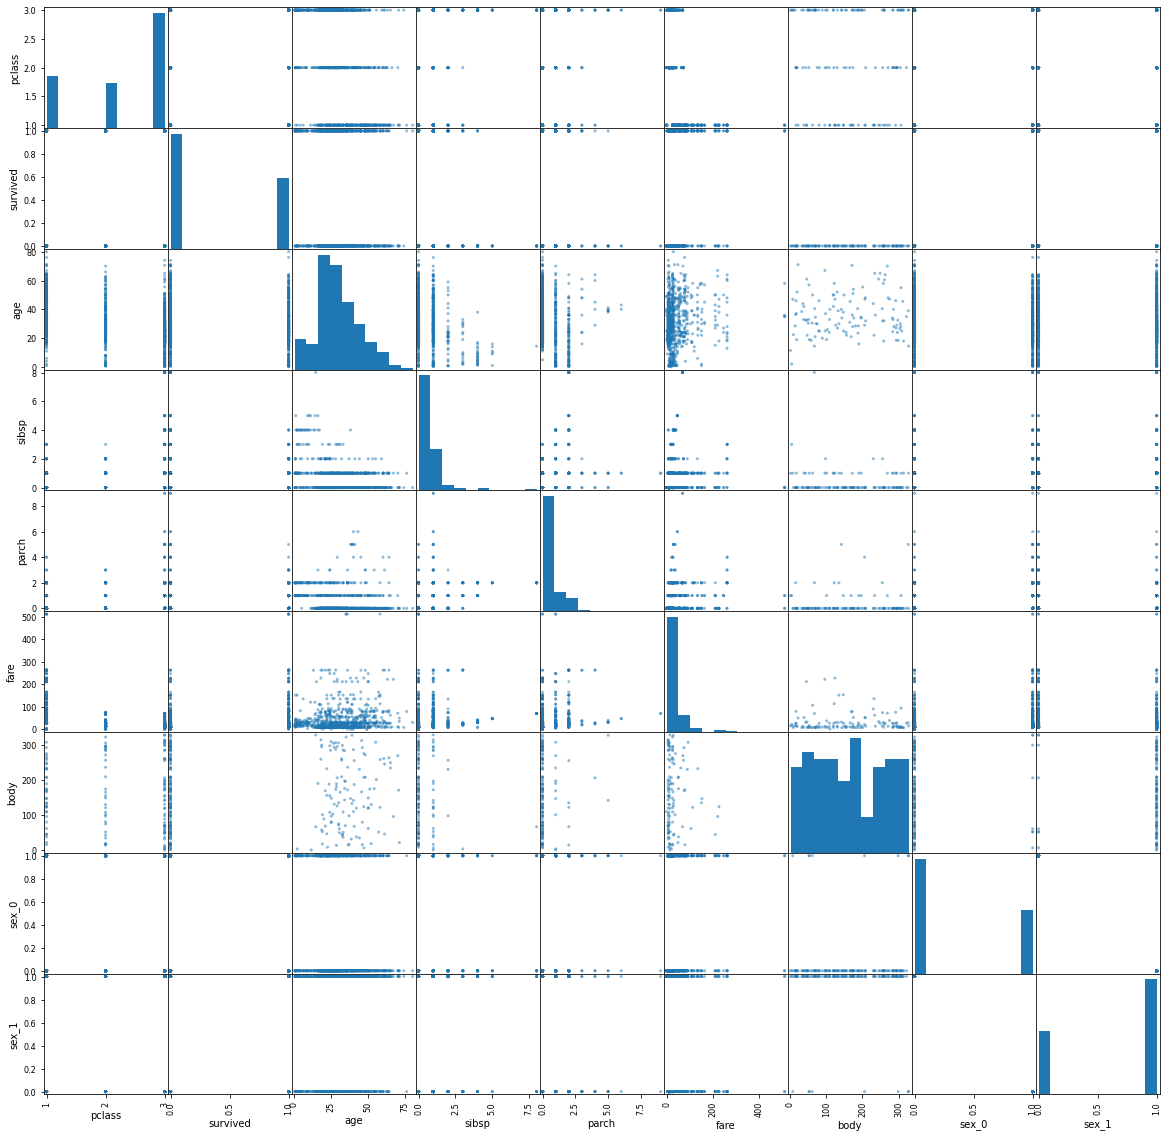

In [9]:
# 【87】
# dfの各列間の散布図を表示
# (from pandas.plotting import scatter_matrixをインポート)

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(20,20))
plt.show()

・%matplotlib inlineを記述することでJupyter Notebook上にインラインで表示  
・データフレームの各列間の散布図を描画するにはscatter_matrixを使用  
・対角線はヒストグラム

<AxesSubplot:xlabel='age', ylabel='fare'>

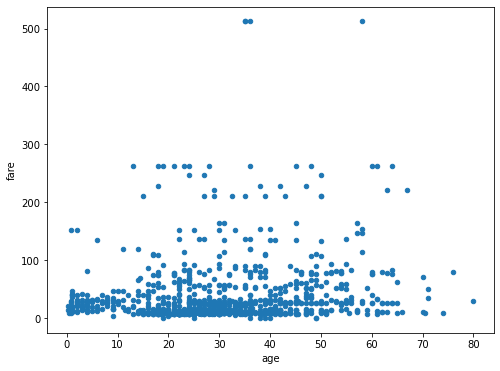

In [10]:
# 【88】
# dfのage列とfare列で散布図を作成

df.plot(kind='scatter',x='age',y='fare',figsize=(8,6))

・散布図を描画するには plot(kind='scatter')を使用  
・figsizeでグラフサイズを指定可能

<AxesSubplot:title={'center':'age-fare scatter'}, xlabel='age', ylabel='fare'>

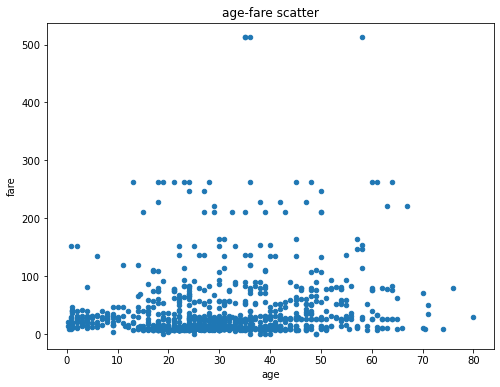

In [11]:
# 【89】
# 【88】で描画したグラフに「age-fare scatter」という
# グラフタイトルをつける

df.plot(kind='scatter',x='age',y='fare',figsize=(8,6),title='age-fare scatter')

・散布図を描画するには plot(kind='scatter')を使用  
・figsizeでグラフサイズを指定可能  
・title=''でグラフタイトルを表示可能